# DATA 1030 Midterm Project: Employees Evaluation for Promotion

**Ziyin Li**

## Dataset

In [1]:
import pandas as pd

In [2]:
import matplotlib
from matplotlib import pylab as plt

In [3]:
import numpy as np

In [4]:
df=pd.read_csv('../data/employee_promotion.csv')

In [5]:
print(df.head())

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8           0                49.0            0  
1         

## EDA (Part I)

In [6]:
df.shape

(54808, 13)

In [7]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [8]:
print(df['is_promoted'].value_counts())

0    50140
1     4668
Name: is_promoted, dtype: int64


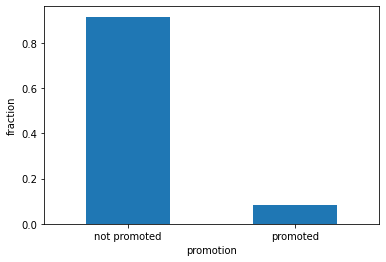

In [9]:
pd.value_counts(df['is_promoted'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('promotion')
plt.xticks([0,1],['not promoted','promoted'],rotation=360)
plt.savefig('../figures/promotion.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
count_matrix=df.groupby(['education','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted              0         1
education                           
Bachelor's        0.917969  0.082031
Below Secondary   0.916770  0.083230
Master's & above  0.901441  0.098559


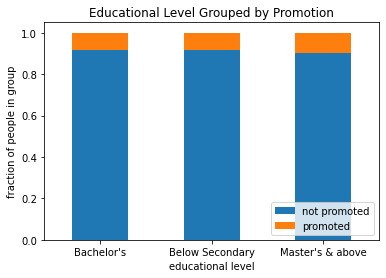

In [11]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('educational level')
plt.legend(['not promoted',"promoted"],loc=4)
plt.xticks(rotation=360)
plt.title('Educational Level Grouped by Promotion')
plt.savefig('../figures/edu_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
count_matrix=df.groupby(['awards_won','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted         0         1
awards_won                     
0            0.923251  0.076749
1            0.559843  0.440157


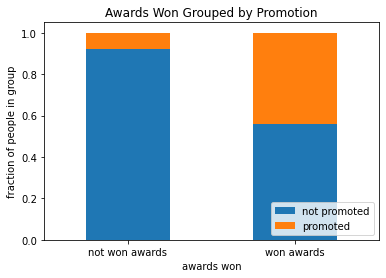

In [13]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('awards won')
plt.legend(['not promoted',"promoted"],loc=4)
plt.xticks([0,1],['not won awards','won awards'],rotation=360)
plt.title('Awards Won Grouped by Promotion')
plt.savefig('../figures/awards_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
count_matrix=df.groupby(['gender','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted         0         1
gender                         
f            0.910066  0.089934
m            0.916849  0.083151


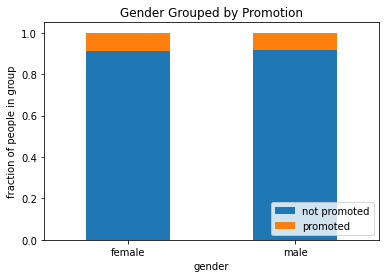

In [15]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('gender')
plt.legend(['not promoted',"promoted"],loc=4)
plt.xticks([0,1],['female','male'],rotation=360)
plt.title('Gender Grouped by Promotion')
plt.savefig('../figures/gender_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

The stacked bar plot shows that gender has little influence on promotion.

In [16]:
count_matrix=df.groupby(['department','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted               0         1
department                           
Analytics          0.904335  0.095665
Finance            0.918770  0.081230
HR                 0.943755  0.056245
Legal              0.948989  0.051011
Operations         0.909852  0.090148
Procurement        0.903614  0.096386
R&D                0.930931  0.069069
Sales & Marketing  0.927969  0.072031
Technology         0.892407  0.107593


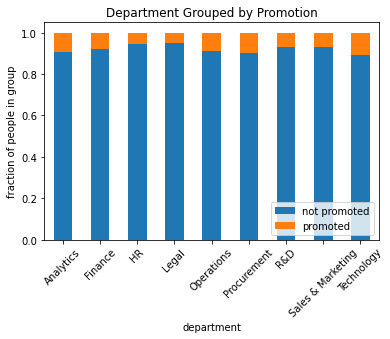

In [17]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('department')
plt.legend(['not promoted',"promoted"],loc=4)
plt.xticks(rotation=45)
plt.title('Department Grouped by Promotion')
plt.savefig('../figures/dep_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
count_matrix=df.groupby(['recruitment_channel','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted                 0         1
recruitment_channel                    
other                0.916048  0.083952
referred             0.879159  0.120841
sourcing             0.914987  0.085013


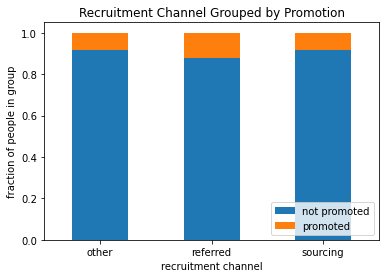

In [19]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('recruitment channel')
plt.legend(['not promoted',"promoted"],loc=4)
plt.xticks(rotation=360)
plt.title('Recruitment Channel Grouped by Promotion')
plt.savefig('../figures/channel_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
count_matrix=df.groupby(['region','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted         0         1
region                         
region_1     0.904918  0.095082
region_10    0.921296  0.078704
region_11    0.943726  0.056274
region_12    0.934000  0.066000
region_13    0.913142  0.086858
region_14    0.925030  0.074970
region_15    0.920940  0.079060
region_16    0.930375  0.069625
region_17    0.863065  0.136935
region_18    0.967742  0.032258
region_19    0.939359  0.060641
region_2     0.919874  0.080126
region_20    0.942353  0.057647
region_21    0.956204  0.043796
region_22    0.885812  0.114188
region_23    0.883404  0.116596
region_24    0.964567  0.035433
region_25    0.874237  0.125763
region_26    0.936726  0.063274
region_27    0.921037  0.078963
region_28    0.883156  0.116844
region_29    0.956740  0.043260
region_3     0.893064  0.106936
region_30    0.910198  0.089802
region_31    0.943152  0.056848
region_32    0.957672  0.042328
region_33    0.962825  0.037175
region_34    0.972603  0.027397
region_4     0.855549  0.144451
region_5

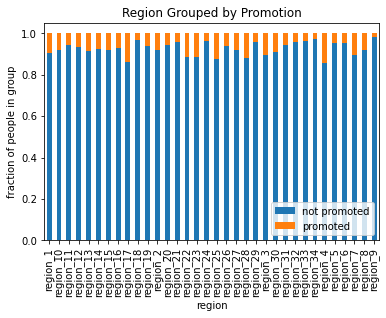

In [21]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('region')
plt.legend(['not promoted',"promoted"],loc=4)
plt.title('Region Grouped by Promotion')
plt.savefig('../figures/region_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

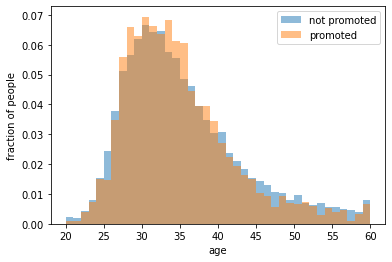

In [22]:
categories = df['is_promoted'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['is_promoted']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=40,density=True)
plt.legend(['not promoted','promoted'])
plt.ylabel('fraction of people')
plt.xlabel('age')
plt.savefig('../figures/age_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

The histogram shows that there is not much difference with the distribution of age for promoted and not promoted employees.

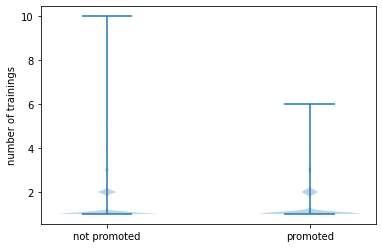

In [23]:
dataset = [df[df['is_promoted']==0]['no_of_trainings'].values,
           df[df['is_promoted']==1]['no_of_trainings'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['not promoted','promoted'])
plt.ylabel('number of trainings')
plt.savefig('../figures/no_trainings_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

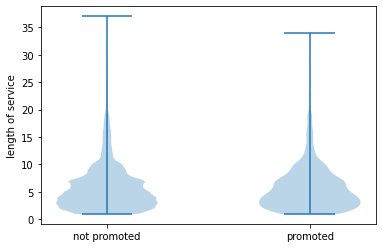

In [24]:
dataset = [df[df['is_promoted']==0]['length_of_service'].values,
           df[df['is_promoted']==1]['length_of_service'].values]
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['not promoted','promoted'])
plt.ylabel('length of service')
plt.savefig('../figures/len_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

The violin plots above show that both number of trainings and length of service have little influence on promotion. 

**Missing Values**

In [25]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [26]:
df.isnull().sum().sum()/len(df)

0.16590643701649394

The proporton of missing values is 16% which cannot be simply ignored.

The three features with missing values are dealt with as below:

In [27]:
df['previous_year_rating'].fillna(value=0,inplace=True) # replace na in previous_year_rating with 0

In [28]:
df=df[df['education'].notna()] # simply drop na in education

In [29]:
df['avg_training_score']=df['avg_training_score'].fillna(df['avg_training_score'].median()) # replace na in avg_training_score with the median

## EDA (Part II)

In [30]:
count_matrix=df.groupby(['previous_year_rating','is_promoted']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

is_promoted                  0         1
previous_year_rating                    
0.0                   0.916020  0.083980
1.0                   0.985392  0.014608
2.0                   0.955638  0.044362
3.0                   0.925841  0.074159
4.0                   0.919340  0.080660
5.0                   0.834976  0.165024


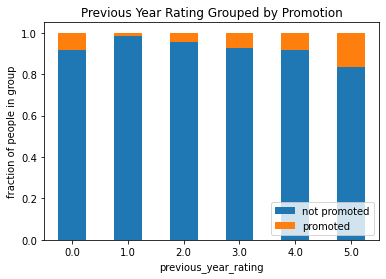

In [31]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('previous_year_rating')
plt.legend(['not promoted',"promoted"],loc=4)
plt.xticks(rotation=360)
plt.title('Previous Year Rating Grouped by Promotion')
plt.savefig('../figures/rating_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

The stacked bar plot shows that employees with high ratings in the previous year are more likely to get promoted. The new recruits with no records of previous ratings also have a relatively good chance for promotion.

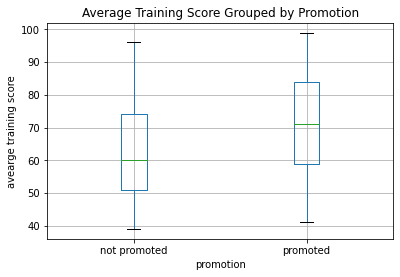

In [32]:
df[['avg_training_score','is_promoted']].boxplot(by='is_promoted')
plt.ylabel('avearge training score')
plt.xlabel('promotion')
plt.xticks([1,2],['not promoted','promoted'])
plt.suptitle('')
plt.title('Average Training Score Grouped by Promotion')
plt.savefig('../figures/score_by_promotion.png', dpi=300, bbox_inches='tight')
plt.show()

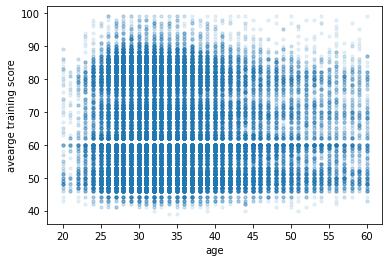

In [33]:
df.plot.scatter('age','avg_training_score',alpha=0.1,s=10)
plt.ylabel('avearge training score')
plt.savefig('../figures/score_age_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
nbins = 20
heatmap, xedges, yedges = np.histogram2d(df['age'], df['length_of_service'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

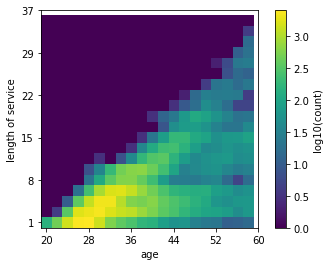

In [35]:
heatmap[heatmap == 0] = 0.1

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('age')
plt.ylabel('length of service')

plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('../figures/len_age_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

The heatmap shows that there is a correlation between length of service and age, which is reasonable. It can also be seen that most of the employees are in the age of 25 to 35 with length of service about 1 to 7 years.

In [36]:
count_matrix=df.groupby(['education','previous_year_rating']).size().unstack()
count_matrix_norm=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

previous_year_rating       0.0       1.0       2.0       3.0       4.0  \
education                                                                
Bachelor's            0.089040  0.113993  0.077231  0.330197  0.178434   
Below Secondary       0.431056  0.040994  0.022360  0.250932  0.124224   
Master's & above      0.008509  0.112161  0.079397  0.372328  0.192027   

previous_year_rating       5.0  
education                       
Bachelor's            0.211105  
Below Secondary       0.130435  
Master's & above      0.235578  


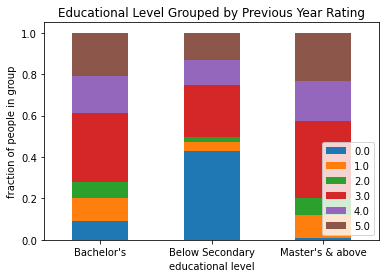

In [37]:
count_matrix_norm.plot(kind='bar',stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('educational level')
plt.legend(loc=4)
plt.xticks(rotation=360)
plt.title('Educational Level Grouped by Previous Year Rating')
plt.savefig('../figures/edu_by_rating.png', dpi=300, bbox_inches='tight')
plt.show()

The stacked bar plot shows that employees with higher educational level generally achieve higher ratings.

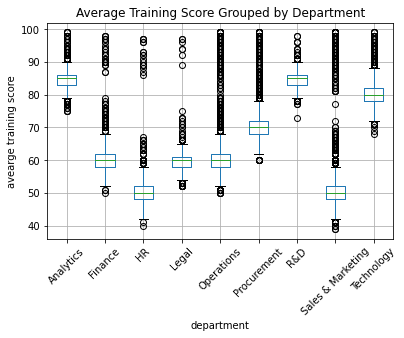

In [38]:
df[['avg_training_score','department']].boxplot(by='department')
plt.ylabel('avearge training score')
plt.xlabel('department')
plt.xticks(rotation=45)
plt.suptitle('')
plt.title('Average Training Score Grouped by Department')
plt.savefig('../figures/score_by_dep.png', dpi=300, bbox_inches='tight')
plt.show()

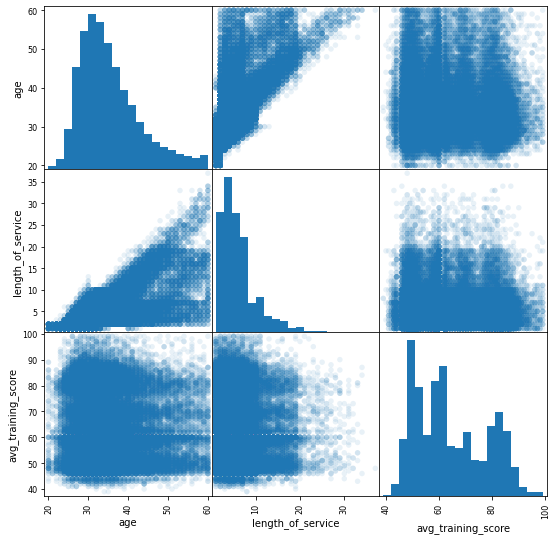

In [39]:
# scatter matrix on three continuous features: age, length of service and avg_training_score
pd.plotting.scatter_matrix(df.loc[:,['age','length_of_service','avg_training_score']], figsize=(9, 9), 
                           marker='o',hist_kwds={'bins': 20}, 
                           s=30, alpha=.1)
plt.savefig('../figures/scatter_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Methods & Results

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score
import pickle

In [41]:
# 4 different ML algorithms are applied
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
def MLpipe_KFold_Scores(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies StratifiedKFold with 4 folds to other.
    The accuracy is maximized in cross-validation.
    '''
    np.random.seed(10)
    
    nr_states = 5
    test_scores = np.zeros(nr_states)
    best_models = []

    for i in range(nr_states): 
        # first split the data to other/test (80/20)
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        # then use StratifiedKFold with 4 folds to other since this dataset is imbalanced
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)
        
        # the ML algorithm
        model = ML_algo(random_state = 42*i) # initialize the ML algorithm
        
        # put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        
        # the coefficients of logistic regression can be used as a measure of feature importance 
        # only if all features have a zero mean and the same standard deviation (usually 1)
        # so standard scale all the features (including one-hot encoded and ordinal features) before fitting into the logistic regression model
        if ML_algo==LogisticRegression:
            final_scaler = StandardScaler()
            pipe = make_pipeline(preprocessor,final_scaler,model)
        else:
            pipe = make_pipeline(preprocessor,model)
        
        # use GridSearchCV to loop through all parameter combinations
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring='accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        grid.fit(X_other, y_other)
        
        # get feature names for the preprocessed data (all 56 features)
        feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs)) + \
                ordinal_ftrs
        
        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_) # the mean validation score over all iterations
        
        # save the model
        best_models.append(grid)
        
        # calculate and save the test score
        y_test_pred = best_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred)
        print('test score:',test_scores[i])
        print('test baseline:',np.sum(y_test == 0)/len(y_test))
        
    return grid, np.array(feature_names), X_test, y_test

In [43]:
# separate the feature matrix X, and target variable y
y=df['is_promoted'] # target variable
X=df.loc[:,(df.columns!='is_promoted') & (df.columns!='employee_id')] # feature matrix

ftr_names=X.columns # feature names of the original dataset (all 11 features)

# collect which encoder to use on each feature manually
ordinal_ftrs=["education","previous_year_rating"] 
ordinal_cats=[["Below Secondary","Bachelor's","Master's & above"],["0","1.0","2.0","3.0","4.0","5.0"]]
onehot_ftrs=["department","region","gender","recruitment_channel","awards_won"]
minmax_ftrs=["age","length_of_service","no_of_trainings","avg_training_score"]

# collect all the encoders
ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories=ordinal_cats))])
onehot_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
minmax_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])

preprocessor = ColumnTransformer(
        transformers=[
            ('minmax', minmax_transformer, minmax_ftrs),
            ('onehot', onehot_transformer, onehot_ftrs),
            ('ordinal', ordinal_transformer, ordinal_ftrs)])

**Logistic Regression**

In [44]:
# no penalty
param_grid = {
              'logisticregression__solver': ['newton-cg','lbfgs','sag','saga'],
              'logisticregression__penalty': ['none']
              }

In [45]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, LogisticRegression, param_grid)
file = open('../results/logistic_regression_1.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}
validation score: 0.9356377604354474
test score: 0.9340648854961832
test baseline: 0.9111641221374046
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}
validation score: 0.9347551086360288
test score: 0.9354961832061068
test baseline: 0.9134541984732825
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}
validation score: 0.9360671201545221
test score: 0.9330152671755725
test baseline: 0.9103053435114504
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}
validation score: 0.9344688627

best model parameters: {'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}

validation score: 0.9341348545874009

test score: 0.9393129770992367

test baseline: 0.9144083969465648

In [46]:
print('Best model accuracy: %.4f' % 0.9393129770992367)
print('Baseline accuracy: %.4f' % 0.9144083969465648)
print('Std over baseline: %.4f' % (0.9393129770992367-0.9144083969465648))

Best model accuracy: 0.9393
Baseline accuracy: 0.9144
Std over baseline: 0.0249


Global feature importances (coefficients of the Logistic Regression model):

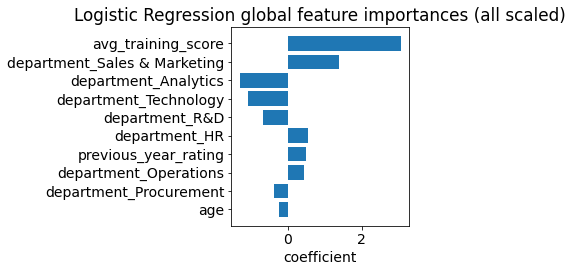

In [47]:
# random_state=42*5
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('Logistic Regression global feature importances (all scaled)')
plt.tight_layout()
plt.savefig('../figures/LR_coefs_scaled.png',dpi=300)
plt.show()

In [48]:
# l1 regularization
param_grid = {
              'logisticregression__solver': ['liblinear','saga'],
              'logisticregression__penalty': ['l1'],
              'logisticregression__C': [5,10,30]
              }

In [49]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, LogisticRegression, param_grid)
file = open('../results/logistic_regression_2.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 30, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
validation score: 0.9356377604354474
test score: 0.9340648854961832
test baseline: 0.9111641221374046
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 5, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
validation score: 0.9347551086360288
test score: 0.9354961832061068
test baseline: 0.9134541984732825
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
validation score: 0.9360671201545221
test score: 0.9330152671755725
test baseline: 0.9103053435114504
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 10, 'lo

best model parameters: {'logisticregression__C': 5, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}

In [50]:
# l2 regularization
param_grid = {
              'logisticregression__solver': ['newton-cg','lbfgs','saga'],
              'logisticregression__penalty': ['l2'],
              'logisticregression__C': [10,20,30]
              }

In [51]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, LogisticRegression, param_grid)
file = open('../results/logistic_regression_3.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'logisticregression__C': 20, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
validation score: 0.9356377604354474
test score: 0.9340648854961832
test baseline: 0.9111641221374046
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
validation score: 0.9347551086360288
test score: 0.9354961832061068
test baseline: 0.9134541984732825
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
validation score: 0.9360671201545221
test score: 0.9330152671755725
test baseline: 0.9103053435114504
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'logisticregression__C': 20, 'logis

best model parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}

In [52]:
# elastic net
param_grid = {
              'logisticregression__solver': ['saga'],
              'logisticregression__penalty': ['elasticnet'],
              'logisticregression__C': [50,75,100],
              'logisticregression__l1_ratio':[1e-7,1e-6]
              }

In [53]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, LogisticRegression, param_grid)
file = open('../results/logistic_regression_4.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 50, 'logisticregression__l1_ratio': 1e-07, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.9355900505117832
test score: 0.9340648854961832
test baseline: 0.9111641221374046
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 50, 'logisticregression__l1_ratio': 1e-07, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.9347551086360288
test score: 0.9354961832061068
test baseline: 0.9134541984732825
Fitting 4 folds for each of 6 candidates, totalling 24 fits
best model parameters: {'logisticregression__C': 75, 'logisticregression__l1_ratio': 1e-07, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation score: 0.9360671201545221
test score: 0.9330152671755725
test baseline: 0.910305

best model parameters: {'logisticregression__C': 50, 'logisticregression__l1_ratio': 1e-07, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}

**Random Forest**

In [54]:
param_grid = {
              'randomforestclassifier__max_depth': [10,15,20],
              'randomforestclassifier__max_features': [40,50,60]
              }

In [55]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, RandomForestClassifier, param_grid)
file = open('../results/random_forest.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.93661582 0.93766544        nan 0.93840497 0.9382857         nan
 0.9367828  0.93644881        nan]
  warnings.warn(
C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.94118021 0.94207877        nan 0.9504282  0.95092917        nan
 0.96839142 0.9693695         nan]
  warnings.warn(


best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 40}
validation score: 0.938404974707685
test score: 0.9361641221374046
test baseline: 0.9111641221374046
Fitting 4 folds for each of 9 candidates, totalling 36 fits


C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.93563774 0.93621029        nan 0.93807103 0.93807103        nan
 0.93618646 0.93563776        nan]
  warnings.warn(
C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.94063949 0.94140287        nan 0.94954555 0.95018966        nan
 0.96641142 0.96703962        nan]
  warnings.warn(


best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 50}
validation score: 0.9380710348359387
test score: 0.9377862595419847
test baseline: 0.9134541984732825
Fitting 4 folds for each of 9 candidates, totalling 36 fits


C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.93621026 0.93728376        nan 0.93833338 0.93842879        nan
 0.9364965  0.93630565        nan]
  warnings.warn(
C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.94145057 0.94229346        nan 0.95061109 0.95129495        nan
 0.96657044 0.96676924        nan]
  warnings.warn(


best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 50}
validation score: 0.9384287864168905
test score: 0.9356870229007633
test baseline: 0.9103053435114504
Fitting 4 folds for each of 9 candidates, totalling 36 fits


C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.93506525 0.9361626         nan 0.93749852 0.93780863        nan
 0.9361149  0.93597175        nan]
  warnings.warn(
C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.93974887 0.94105298        nan 0.94937061 0.94987158        nan
 0.9663637  0.96681696        nan]
  warnings.warn(


best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 50}
validation score: 0.937808634808694
test score: 0.9395992366412214
test baseline: 0.9141221374045801
Fitting 4 folds for each of 9 candidates, totalling 36 fits


C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.93473124 0.93587631        nan 0.9368544  0.93683054        nan
 0.93520835 0.93506525        nan]
  warnings.warn(
C:\Users\zhangxuezhen\.julia\conda\3\envs\data1030\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [0.93985226 0.94085419        nan 0.94921158 0.94987158        nan
 0.96693625 0.96776324        nan]
  warnings.warn(


best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 40}
validation score: 0.9368543976356931
test score: 0.9409351145038168
test baseline: 0.9144083969465648


best model parameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 40}

validation score: 0.9368543976356931

test score: 0.9409351145038168

test baseline: 0.9144083969465648

In [56]:
print('Best model accuracy: %.4f' % 0.9409351145038168)
print('Baseline accuracy: %.4f' % 0.9144083969465648)
print('Std over baseline: %.4f' % (0.9409351145038168-0.9144083969465648))

Best model accuracy: 0.9409
Baseline accuracy: 0.9144
Std over baseline: 0.0265


Global feature importances (metrics of the Random Forest model):

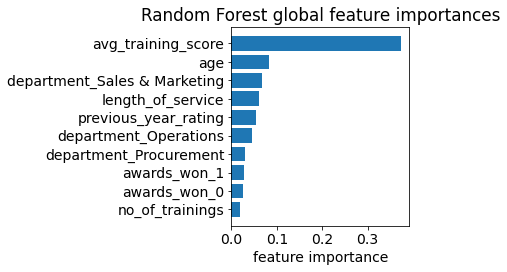

In [57]:
# random_state=42*5
coefs = grid.best_estimator_[-1].feature_importances_
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('feature importance')
plt.title('Random Forest global feature importances')
plt.tight_layout()
plt.savefig('../figures/RF_global_feature_importances.png',dpi=300)
plt.show()

Local feature importances (SHAP values for the Random Forest model):

In [58]:
import shap

In [59]:
shap.initjs()

# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])

# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))

# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(10480, 56)
(2, 1000, 56)


In [60]:
# shap values for local feature importances
shap_values[0][0]

array([-1.83824045e-03, -3.67741836e-03, -7.70917441e-04, -3.01739922e-02,
       -1.90582798e-03,  7.59886634e-03,  8.44513398e-04,  2.09534451e-04,
        2.95460347e-02,  1.08679048e-02, -1.22486818e-03,  1.31735916e-02,
       -2.19991517e-03,  9.49900440e-05,  7.81523255e-05,  9.60168325e-05,
        5.90638118e-05,  3.03234867e-04,  8.76040334e-05,  3.17216261e-04,
        7.86020321e-05,  6.73679379e-04,  5.49020929e-06,  7.21656914e-05,
        8.97347359e-04,  5.36510839e-05,  8.39369203e-05, -1.34730986e-02,
        7.78830197e-04, -1.41121631e-05,  2.35096403e-04,  1.52774035e-04,
        1.30608108e-04,  4.03979625e-04,  6.13411318e-05,  9.95023591e-05,
        1.09216439e-04,  1.21382241e-04,  6.16675900e-05,  2.75519845e-05,
        6.59232439e-06,  5.65279640e-04,  5.51604375e-05,  5.99813792e-05,
        1.23336289e-03,  2.49964229e-04,  3.84053293e-05,  5.96230989e-04,
        9.28008008e-04, -7.41230039e-04,  2.46359998e-04, -1.14835501e-03,
        2.68590524e-03,  

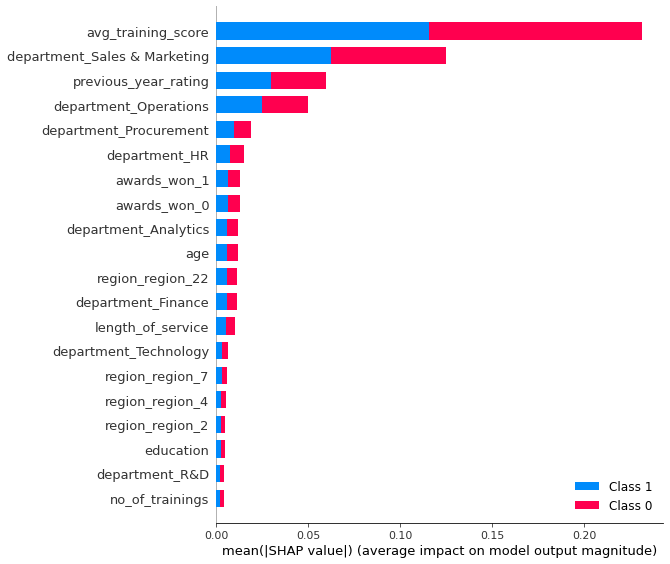

In [61]:
# shap values for global feature importances
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)

**Gradient Boosting**

In [62]:
param_grid = {
        'gradientboostingclassifier__n_estimators': [10],
        'gradientboostingclassifier__max_depth': [3,4,5],
        'gradientboostingclassifier__learning_rate': [0.5,0.6,0.75]
        }

In [63]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, GradientBoostingClassifier, param_grid)
file = open('../results/gradient_boosting.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'gradientboostingclassifier__learning_rate': 0.75, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 10}
validation score: 0.9372360497075576
test score: 0.9358778625954198
test baseline: 0.9111641221374046
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'gradientboostingclassifier__learning_rate': 0.5, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 10}
validation score: 0.9367589573002785
test score: 0.9369274809160305
test baseline: 0.9134541984732825
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'gradientboostingclassifier__learning_rate': 0.5, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 10}
validation score: 0.9374507602992244
test score: 0.933969465648855
test baseline: 0.9103053435114504
Fitting 4 folds 

best model parameters: {'gradientboostingclassifier__learning_rate': 0.6, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 10}

validation score: 0.93566164954409

test score: 0.937881679389313

test baseline: 0.9144083969465648

In [64]:
print('Best model accuracy: %.4f' % 0.937881679389313)
print('Baseline accuracy: %.4f' % 0.9144083969465648)
print('Std over baseline: %.4f' % (0.937881679389313-0.9144083969465648))

Best model accuracy: 0.9379
Baseline accuracy: 0.9144
Std over baseline: 0.0235


Global feature importances (permutation feature importance for Gradient Boosting model):

In [65]:
file = open('../results/gradient_boosting.save', 'rb')
grid, _, X_test, y_test = pickle.load(file)
file.close()

np.random.seed(10)
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling department
   shuffled test score: 0.783 +/- 0.002
shuffling region
   shuffled test score: 0.937 +/- 0.0
shuffling education
   shuffled test score: 0.938 +/- 0.0
shuffling gender
   shuffled test score: 0.938 +/- 0.0
shuffling recruitment_channel
   shuffled test score: 0.938 +/- 0.0
shuffling no_of_trainings
   shuffled test score: 0.938 +/- 0.0
shuffling age
   shuffled test score: 0.937 +/- 0.0
shuffling previous_year_rating
   shuffled test score: 0.936 +/- 0.0
shuffling length_of_service
   shuffled test score: 0.938 +/- 0.0
shuffling awards_won
   shuffled test score: 0.935 +/- 0.0
shuffling avg_training_score
   shuffled test score: 0.762 +/- 0.004


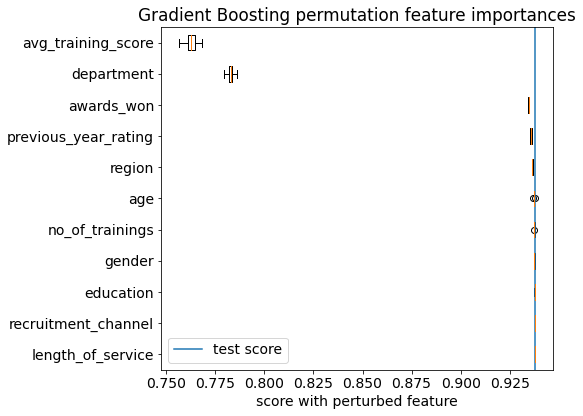

In [66]:
test_score = grid.score(X_test,y_test)
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title('Gradient Boosting permutation feature importances')
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/GB_permutation_feature_importances.png',dpi=300)
plt.show()

**XGBoost**

In [67]:
param_grid = {
              'xgbclassifier__max_depth': [3,4,5],
              'xgbclassifier__min_child_weight': [1],
              'xgbclassifier__gamma': [0.1,0.5],
              'xgbclassifier__verbosity':[0]
              }

In [68]:
grid, feature_names, X_test, y_test = MLpipe_KFold_Scores(X, y, preprocessor, XGBClassifier, param_grid)
file = open('../results/xgboost.save', 'wb')
pickle.dump((grid, feature_names, X_test, y_test),file)
file.close()

Fitting 4 folds for each of 6 candidates, totalling 24 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


best model parameters: {'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__verbosity': 0}
validation score: 0.9400987202503881
test score: 0.9366412213740458
test baseline: 0.9111641221374046
Fitting 4 folds for each of 6 candidates, totalling 24 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


best model parameters: {'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__verbosity': 0}
validation score: 0.9393353614717621
test score: 0.9387404580152672
test baseline: 0.9134541984732825
Fitting 4 folds for each of 6 candidates, totalling 24 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


best model parameters: {'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__verbosity': 0}
validation score: 0.9397647280201988
test score: 0.937118320610687
test baseline: 0.9103053435114504
Fitting 4 folds for each of 6 candidates, totalling 24 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


best model parameters: {'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__verbosity': 0}
validation score: 0.9392161321916825
test score: 0.940267175572519
test baseline: 0.9141221374045801
Fitting 4 folds for each of 6 candidates, totalling 24 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


best model parameters: {'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__verbosity': 0}
validation score: 0.9384050020251335
test score: 0.942175572519084
test baseline: 0.9144083969465648


best model parameters: {'xgbclassifier__gamma': 0.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__verbosity': 0}

validation score: 0.9384050020251335

test score: 0.942175572519084

test baseline: 0.9144083969465648

In [69]:
print('Best model accuracy: %.4f' % 0.942175572519084)
print('Baseline accuracy: %.4f' % 0.9144083969465648)
print('Std over baseline: %.4f' % (0.942175572519084-0.9144083969465648))

Best model accuracy: 0.9422
Baseline accuracy: 0.9144
Std over baseline: 0.0278


Global feature importances (metrics of the XGBoost model):

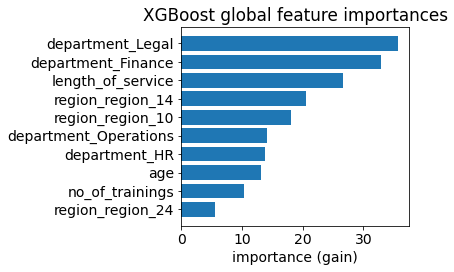

In [70]:
# random_state=42*5
coefs = grid.best_estimator_[-1].get_booster().get_score(importance_type='gain').values()
coefs = np.array(list(coefs))
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('importance (gain)')
plt.title('XGBoost global feature importances')
plt.tight_layout()
plt.savefig('../figures/XGB_global_feature_importances.png',dpi=300)
plt.show()

(The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.)

There is a problem in the above figure that the avg_training_score feature does not appear in the top 10 most important features but it should be the most important according to results from the other models.

Try another method for global feature impotance (permutation feature importance for XGBoost model):

In [71]:
file = open('../results/xgboost.save', 'rb')
grid, _, X_test, y_test = pickle.load(file)
file.close()

np.random.seed(10)
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling department
   shuffled test score: 0.715 +/- 0.002
shuffling region
   shuffled test score: 0.942 +/- 0.0
shuffling education
   shuffled test score: 0.942 +/- 0.0
shuffling gender
   shuffled test score: 0.942 +/- 0.0
shuffling recruitment_channel
   shuffled test score: 0.942 +/- 0.0
shuffling no_of_trainings
   shuffled test score: 0.942 +/- 0.0
shuffling age
   shuffled test score: 0.941 +/- 0.0
shuffling previous_year_rating
   shuffled test score: 0.941 +/- 0.0
shuffling length_of_service
   shuffled test score: 0.942 +/- 0.0
shuffling awards_won
   shuffled test score: 0.94 +/- 0.0
shuffling avg_training_score
   shuffled test score: 0.678 +/- 0.004


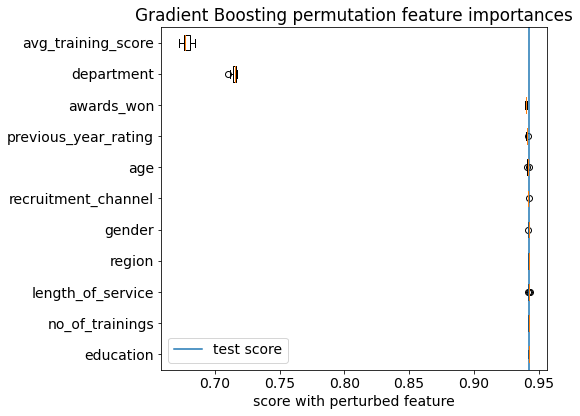

In [72]:
test_score = grid.score(X_test,y_test)
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title('Gradient Boosting permutation feature importances')
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/GB_permutation_feature_importances.png',dpi=300)
plt.show()